# Neural network with one hidden layer

In this notebook we will try out a standard logistic regression and a custome neural network for classification between classes.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, f1_score, accuracy_score

from simple_nn import OneLayerNN

from utils.data_utils import cluster_dataset, cluster_dataset_2, cluster_dataset_3, plot_decision_boundary

## Load datasets

Let's load our datasets and do some initial investigation on how the classes are distributed.

In [38]:
# Load datasets
X, y = cluster_dataset()
X2, y2 = cluster_dataset_2()
X3, y3 = cluster_dataset_3()

Text(0.5, 0, 'x1')

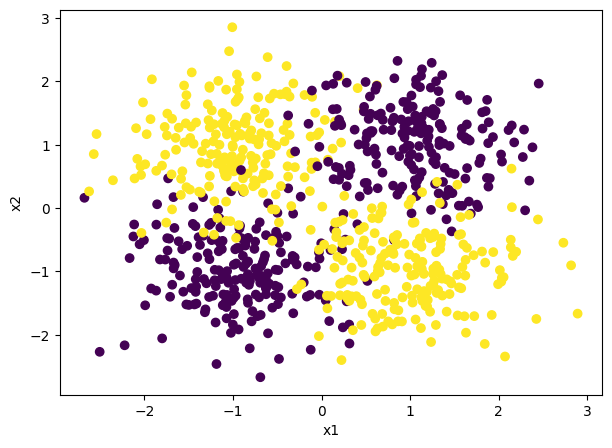

In [39]:
# Visualize first dataset
plt.figure(figsize=(7, 5))
plt.scatter(X[0, :], X[1, :], c=y)
plt.ylabel('x2')
plt.xlabel('x1')

In [40]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')
print(f'Nr of training examples: {y.shape[1]}')

Shape of X: (2, 800)
Shape of y: (1, 800)
Nr of training examples: 800


> Note that now the rows of `X` are corresponding to the nr of features, while the columns correspond to the nr of examples.

Text(0.5, 0, 'x1')

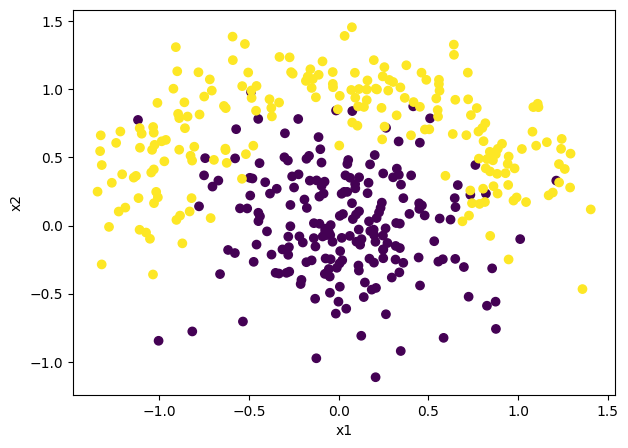

In [41]:
# Visualize second dataset
plt.figure(figsize=(7, 5))
plt.scatter(X2[0, :], X2[1, :], c=y2)
plt.ylabel('x2')
plt.xlabel('x1')

In [42]:
print(f'Shape of X: {X2.shape}')
print(f'Shape of y: {y2.shape}')
print(f'Nr of training examples: {y2.shape[1]}')

Shape of X: (2, 400)
Shape of y: (1, 400)
Nr of training examples: 400


Text(0.5, 0, 'x1')

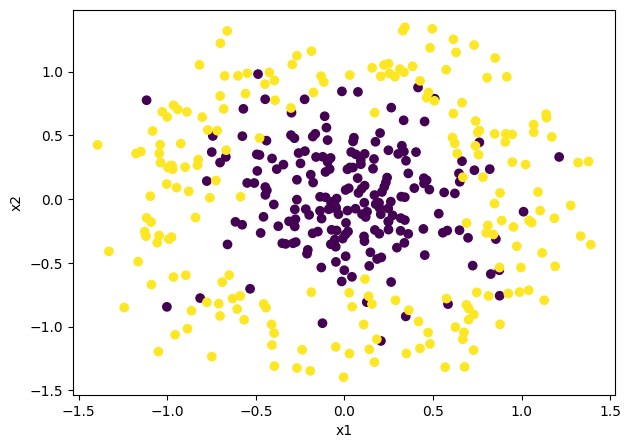

In [43]:
# Visualize second dataset
plt.figure(figsize=(7, 5))
plt.scatter(X3[0, :], X3[1, :], c=y3)
plt.ylabel('x2')
plt.xlabel('x1')

In [44]:
print(f'Shape of X: {X3.shape}')
print(f'Shape of y: {y3.shape}')
print(f'Nr of training examples: {y3.shape[1]}')

Shape of X: (2, 400)
Shape of y: (1, 400)
Nr of training examples: 400


## Train classic logistic classifier

Let's train a standard logistic classifier on our datasets and see how it performs.

### First dataset

Accuracy: 0.5025
Logloss: 17.183239156832038
F1 score: 0.5012531328320802


/Users/a963850/Documents/github/deep-learning/deep-learning-fundamentals/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


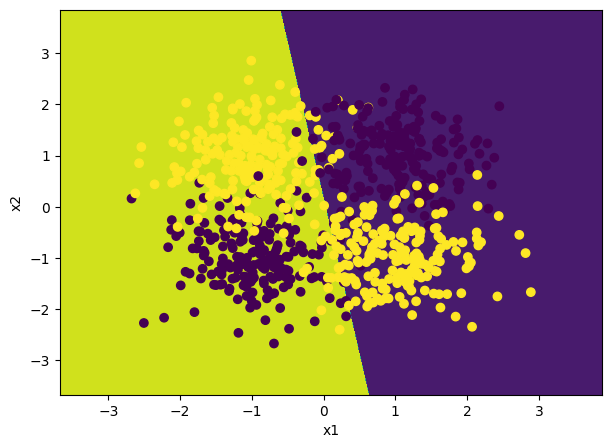

In [45]:
# Train logistic classifier
clf = LogisticRegressionCV()
clf.fit(X.T, y.T)

# Plot decision boundary
plot_decision_boundary(lambda x: clf.predict(x), X, y)

# Performance metrics
y_pred = clf.predict(X.T)

print(f'Accuracy: {accuracy_score(y.T, y_pred)}')
print(f'Logloss: {log_loss(y.T, y_pred)}')
print(f'F1 score: {f1_score(y.T, y_pred)}')

### Second dataset

Accuracy: 0.795
Logloss: 7.080531119693286
F1 score: 0.795


/Users/a963850/Documents/github/deep-learning/deep-learning-fundamentals/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


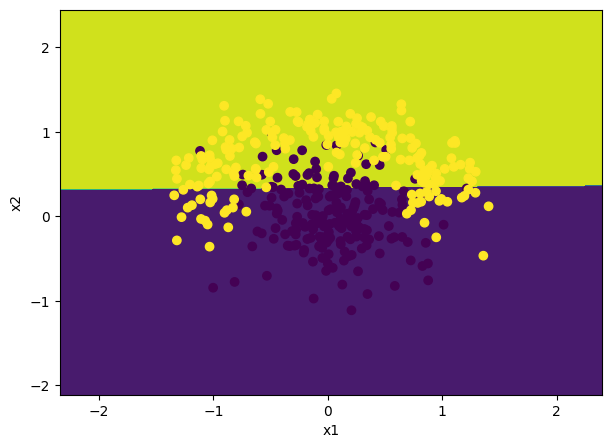

In [46]:
# Train logistic classifier
clf2 = LogisticRegressionCV()
clf2.fit(X2.T, y2.T)

# Plot decision boundary
plot_decision_boundary(lambda x: clf2.predict(x), X2, y2)

# Performance metrics
y_pred2 = clf2.predict(X2.T)

print(f'Accuracy: {accuracy_score(y2.T, y_pred2)}')
print(f'Logloss: {log_loss(y2.T, y_pred2)}')
print(f'F1 score: {f1_score(y2.T, y_pred2)}')

### Third dataset

/Users/a963850/Documents/github/deep-learning/deep-learning-fundamentals/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.505
Logloss: 17.09689221584476
F1 score: 0.505


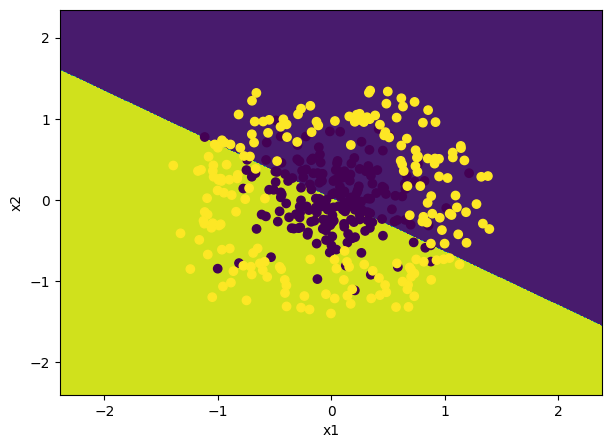

In [47]:
# Train logistic classifier
clf3 = LogisticRegressionCV()
clf3.fit(X3.T, y3.T)

# Plot decision boundary
plot_decision_boundary(lambda x: clf3.predict(x), X3, y3)

# Performance metrics
y_pred3 = clf3.predict(X3.T)

print(f'Accuracy: {accuracy_score(y3.T, y_pred3)}')
print(f'Logloss: {log_loss(y3.T, y_pred3)}')
print(f'F1 score: {f1_score(y3.T, y_pred3)}')

As can be seen the models are not performing that good since the data is not linearly separable.

## Train neural network classifier

Now let's try to train our custom neural network with one hidden layer with four units on the datasets and see how it performs.

### First dataset

We start with the first dataset with four different clusters.

In [48]:
# Instantiate model
model = OneLayerNN()

# Train classifier
model.call(X, y, learning_rate=0.1, print_cost=True)

Cost after iteration 0: 0.6931467973721869
Cost after iteration 1000: 0.6931382365391002
Cost after iteration 2000: 0.6930990126047786
Cost after iteration 3000: 0.693020959414019
Cost after iteration 4000: 0.6927289141840255
Cost after iteration 5000: 0.5023818702518877
Cost after iteration 6000: 0.3811665302359426
Cost after iteration 7000: 0.2507376830658017
Cost after iteration 8000: 0.231686764663189
Cost after iteration 9000: 0.22827510766581433


In [49]:
# Performance metrics
model_pred = model.predict(X)

print(f'Accuracy: {accuracy_score(y.T, model_pred)}')
print(f'Logloss: {log_loss(y.T, model_pred)}')
print(f'F1 score: {f1_score(y.T, model_pred)}')

Accuracy: 0.905
Logloss: 3.2812247368848126
F1 score: 0.9057071960297767


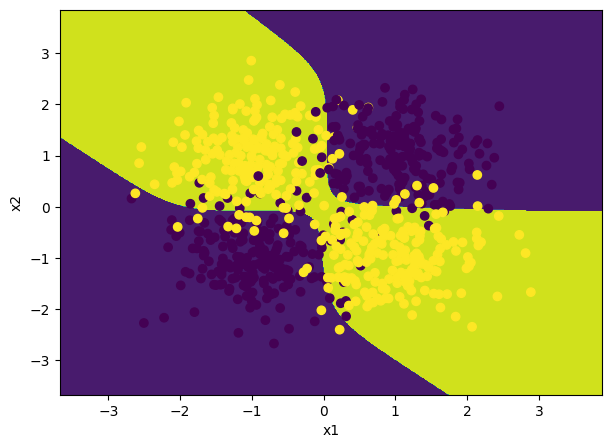

In [50]:
# Plot decision boundary
plot_decision_boundary(lambda x: model.predict(x.T), X, y)

### Second dataset

Next, we train a model on the second dataset with two clusters.

In [51]:
# Instantiate model
model2 = OneLayerNN()

# Train classifier
model2.call(X2, y2, learning_rate=0.5, print_cost=True)

Cost after iteration 0: 0.6931360056559666
Cost after iteration 1000: 0.18355162956683674
Cost after iteration 2000: 0.17813656915710582
Cost after iteration 3000: 0.17619525052196522
Cost after iteration 4000: 0.17521778943608549
Cost after iteration 5000: 0.174559012599107
Cost after iteration 6000: 0.17408327651990996
Cost after iteration 7000: 0.17370664547848172
Cost after iteration 8000: 0.17338377922456633
Cost after iteration 9000: 0.173090528458662


In [52]:
# Performance metrics
model_pred2 = model2.predict(X2)

print(f'Accuracy: {accuracy_score(y2.T, model_pred2)}')
print(f'Logloss: {log_loss(y2.T, model_pred2)}')
print(f'F1 score: {f1_score(y2.T, model_pred2)}')

Accuracy: 0.9275
Logloss: 2.5041032674961103
F1 score: 0.9297820823244551


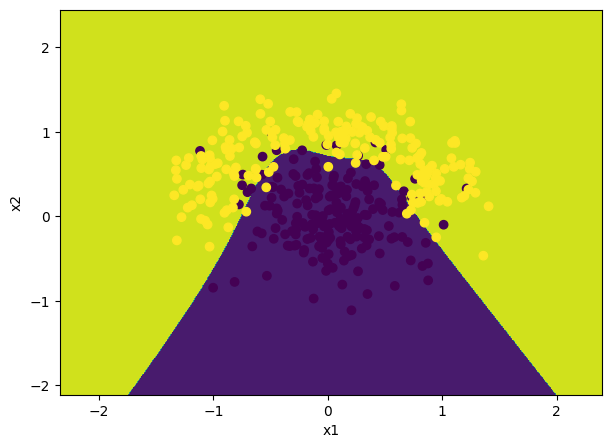

In [53]:
# Plot decision boundary
plot_decision_boundary(lambda x: model2.predict(x.T), X2, y2)

### Third dataset

Next, we train a model on the third dataset with two clusters.

In [54]:
# Instantiate model
model3 = OneLayerNN()

# Train classifier
model3.call(X3, y3, learning_rate=1.2, print_cost=True)

Cost after iteration 0: 0.6931473042801949
Cost after iteration 1000: 0.3496978773469989
Cost after iteration 2000: 0.23981548715322532
Cost after iteration 3000: 0.2378426652149294
Cost after iteration 4000: 0.2374948886801091
Cost after iteration 5000: 0.2389203380802671
Cost after iteration 6000: 0.23907196042286066
Cost after iteration 7000: 0.23914434695030684
Cost after iteration 8000: 0.2391355635168017
Cost after iteration 9000: 0.23901893007382444


In [55]:
# Performance metrics
model_pred3 = model3.predict(X3)

print(f'Accuracy: {accuracy_score(y3.T, model_pred3)}')
print(f'Logloss: {log_loss(y3.T, model_pred3)}')
print(f'F1 score: {f1_score(y3.T, model_pred3)}')

Accuracy: 0.905
Logloss: 3.281245726317356
F1 score: 0.9103773584905661


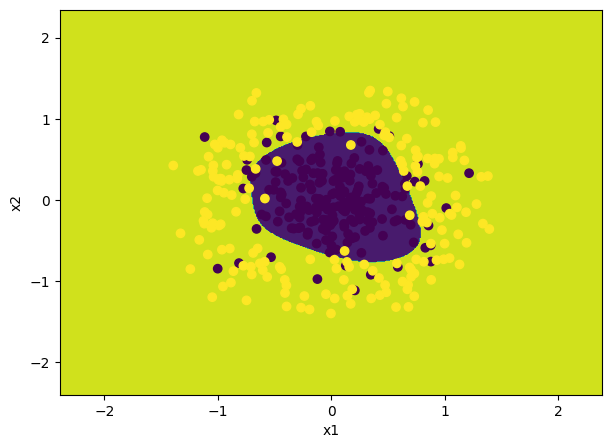

In [56]:
# Plot decision boundary
plot_decision_boundary(lambda x: model3.predict(x.T), X3, y3)

## Conclusion

As can be seen for both different datasets, our custom neural network is better at separating between the classes. That is great!